In [9]:
from fex.config import cfg
from fex.utils.load import load_from_pretrain
from fex.utils.hdfs_io import hopen
from fex.data import BertTokenizer


from example.vision2text.igpt import IGPTNet
from example.vision2text.dataset import get_transform
from example.vision2text.utils import sample

import requests
from PIL import Image
import io

In [2]:
image_urls = ["http://p-risk.byted.org/img/labis/e8abd402c2ae25aaf5d87a95d2c1967e~320x320.jpeg",
    "http://tosv.byted.org/obj/tos-cn-p-0015/526095b2e0b44190b0d10fb44158accd_1594198379",
    "http://p.pstatp.com/obj/tos-cn-p-0015/940ba432ca274729bda0d6b869bd0c47_1592561533",
    "http://p.pstatp.com/obj/tos-cn-p-0015/39068dacd878442e882768ae975562f1_1587810872",
    "http://p.pstatp.com/obj/tos-cn-p-0015/7491fc2e21f947609876f81d428cc2b5_1595838366",
    "http://p.pstatp.com/obj/tos-cn-p-0000/29f8903e707495e767ba70609925799b",
    "http://p.pstatp.com/obj/tos-cn-p-0015/2e51011f8d1a49afb53cd69b8819f582_1595504158",
    "http://p.pstatp.com/obj/tos-cn-p-0015/7bc6738575524121acbaa09bde445e7a_1576753173",
    "http://p.pstatp.com/obj/p1901/0sgd2gqqaod4q1t6fglb0000c3f0020v0200021905",
    "http://p-risk.byted.org/img/labis/77b83f6b8833b23321647c8a7af2bc3e~320x320.jpeg"
            ]

In [3]:
CONFIG_PATH = "./example/vision2text/config.yaml"
CKPT_PATH = "hdfs://haruna/home/byte_search_nlp_lq/user/huangwenguan/clue/igpt_ts1kw_2/model_state_epoch_20000.th"


# load model
cfg.update_cfg(CONFIG_PATH)
model = IGPTNet(config=cfg)
load_from_pretrain(model, CKPT_PATH, [])
model.eval()
model = model.cuda()

vocab_file = cfg.DATASET.VOCAB_FILE
tokenizer = BertTokenizer(vocab_file, do_lower_case=False)

transform = get_transform('val')


/data00/huangwenguan/vlws/fex/fex/utils/load.py:32: UserWarning: miss keys: ['bn1.num_batches_tracked', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.bn2.num_batches_tracked', 'layer1.1.bn3.num_batches_tracked', 'layer1.2.bn1.num_batches_tracked', 'layer1.2.bn2.num_batches_tracked', 'layer1.2.bn3.num_batches_tracked', 'layer2.0.bn1.num_batches_tracked', 'layer2.0.bn2.num_batches_tracked', 'layer2.0.bn3.num_batches_tracked', 'layer2.0.downsample.1.num_batches_tracked', 'layer2.1.bn1.num_batches_tracked', 'layer2.1.bn2.num_batches_tracked', 'layer2.1.bn3.num_batches_tracked', 'layer2.2.bn1.num_batches_tracked', 'layer2.2.bn2.num_batches_tracked', 'layer2.2.bn3.num_batches_tracked', 'layer2.3.bn1.num_batches_tracked', 'layer2.3.bn2.num_batches_tracked', 'layer2.3.bn3.num_batches_tracked', 'layer3.0.bn1.num_batches_tracked', 'layer3.0.bn2.

In [15]:
def download(image_url):
    req = requests.get(image_url)
    if req.status_code == 200:
        return req.content

def load_image(buffer):
    return Image.open(io.BytesIO(buffer))

    
def generate_from_url(url, trial_num=5):
    content = download(url)
    img_pil = load_image(content)
    img_pil_to_dis = img_pil.copy()
    img_pil_to_dis = img_pil_to_dis.resize((224, 224))
    display(img_pil_to_dis)
    img_tensor = transform(img_pil)
    img_tensor = img_tensor.cuda().unsqueeze(0)
    for i in range(trial_num):
        print('trial %s' % i)
        y = sample(model, image=img_tensor, x=None,
                   steps=15, temperature=0.9, sample=True,
                   top_k=5)
        y = y.tolist()[0]
        completion = ''.join(tokenizer.convert_ids_to_tokens(y))
        print(completion)

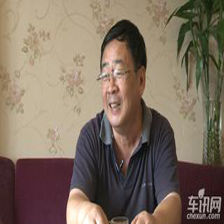

trial 0
中国书法家协会常务副会长,中国书法协会会员,北京市书法家
trial 1
中国工程院院士王##炳##华
trial 2
《我的父亲母亲》
trial 3
张##鹤##伦
trial 4
【人物】陈##鸿##飞:我在岗位上


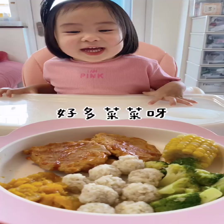

trial 0
【图片】回复:【我的世界】【我要做个
trial 1
我想吃掉你的胰##脏
trial 2
小丸子的厨房
trial 3
我的世界
trial 4
小丸子


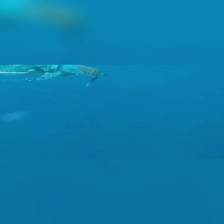

trial 0
蓝色的海洋
trial 1
蓝色海洋
trial 2
蓝色的海
trial 3
海
trial 4
海##葵


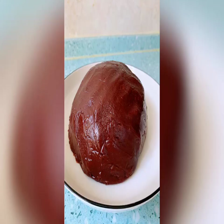

trial 0
烤箱做蛋糕的做法
trial 1
烤箱版奥尔良烤鸡翅的做法
trial 2
自制巧克力草莓慕斯
trial 3
巧克力熔岩蛋糕
trial 4
做过超完美味道超##正的蛋挞配方比kf##c的还要


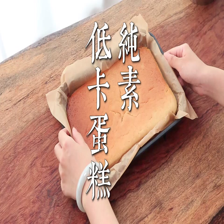

trial 0
【我想和你在一起】
trial 1
ins超火老爹鞋女2019春##款百搭厚底运动休闲厚底增高
trial 2
小可爱
trial 3
小仙女
trial 4
网红小清新ins超火的网红蛋糕卷


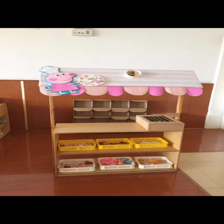

trial 0
儿童玩具
trial 1
小##伶玩具
trial 2
生日礼物女生创意实用送女友男友男友女朋友男朋友同学同学生日礼物
trial 3
宝宝的小玩具
trial 4
小##伶玩具


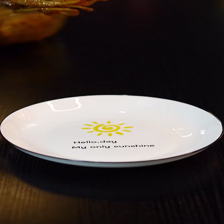

trial 0
【图片】回复:【原创】【转载】【图】【
trial 1
【原创】
trial 2
【原创】【原创】中国传统瓷器鉴赏
trial 3
【图】【图片】回复:【原创】【图】【
trial 4
青花瓷碗


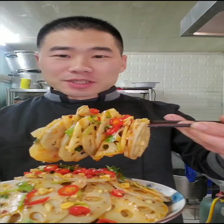

trial 0
快手直播
trial 1
小小豆子
trial 2
我的世界
trial 3
小虾米
trial 4
西红柿鸡蛋面


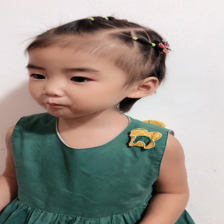

trial 0
小酒窝
trial 1
小宝贝-唱吧,最时尚的手机ktv
trial 2
李小喵
trial 3
小可爱
trial 4
阿##童##木照片


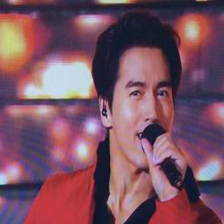

trial 0
我要成为超级巨星
trial 1
【文章】这才是真正的“大黑牛”_车家
trial 2
《我在北京等你》:这首歌唱出来的撕心裂
trial 3
《青春有你2》选手排名，虞##书##欣垫底，蔡徐坤第二
trial 4
《中国新说唱》:最火的不是《歌手》，而是


In [17]:
for i in image_urls:
    generate_from_url(i)